# Team 40 | Visualization

*Natural Disaster Projection Due To Climate Change Effects*

* Luis Ruiz Ponce.
* Simón Vallejo.
* Malcom Giraldo.
* Christian Fuertes.
* Juan Felipe Monsalvo.
* Sandra Barreto.
* Guillermo Giraldo.
* Francisco Rodriguez.


## Libraries import

In [ ]:
import os
import pandas as pd
import numpy as np

import plotly
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns





from scipy import stats
import statsmodels.formula.api as smf

from IPython.display import IFrame

#from statsmodels.tsa.seasonal import seasonal_decompose

#import statsmodels.api as sm

#import pingouin


from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Function definition

In [ ]:
def missing_percentage(df):
  """
  This function calculate the percentage of missing values by columns in a dataframe
  INPUT:
    df: Pandas dataframe to analyze
  RETURN:
    missing_df: df containing the number and percentage of missing in every columns
  """
  missing_df = df.isnull().sum().to_frame().reset_index()
  missing_df.columns=["Features", "# Missing Values"]
  missing_df["% of Missing Values"] = (missing_df["# Missing Values"] / len(df) ) * 100

  return missing_df

##Mounting the Google Drive

In [ ]:
# Loading our own drive from google
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Exploring the folders

In [ ]:
# Path variables
data_path = '/drive/MyDrive/DS4A - Team 40/00_DATA'
raw_data_path = data_path + '/00_RAW_DATA'
clean_data_path = data_path + '/01_CLEAN_DATA'

In [ ]:
# All the files and folders under our path
print(f'These are the files inside directory 00_DATA {os.listdir(data_path)}')
print(f'These are the files inside directory 00_DATA/00_RAW_DATA {os.listdir(raw_data_path)}')
print(f'These are the files inside directory 00_DATA/01_CLEAN_DATA {os.listdir(clean_data_path)}')

These are the files inside directory 00_DATA ['00_RAW_DATA', '01_CLEAN_DATA', 'XX_HTML', 'Data_EDA_Country | Team 40.ipynb', 'EDA.oxps', 'Images', 'Data_EDA Test| Team 40.ipynb', 'Data_EDA_Luis | Team 40.ipynb', '01_Visualization_Disasters| Team 40.ipynb', 'Data_EDA Disasters| Team 40.ipynb', 'Data_EDA Climate| Team 40.ipynb', 'Read_netCDF - Climate| Team 40.ipynb', 'Model_Disasters| Team 40.ipynb', 'Model_Temp| Team 40.ipynb', 'Visualization_Temp| Team 40.ipynb']
These are the files inside directory 00_DATA/00_RAW_DATA ['GlobalLandTemperaturesByCity.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalTemperatures.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'DISASTERS', 'New', 'new_disaster_data_EXCEL.xlsx', 'disaster_data.csv', 'climatology_Months.nc', 'climatology_Year.nc', 'Temperature_by_countries', 'temp_mean.7z', 'tas_timeseries_monthly_cru_1901-2020_ABW.csv', 'Temperature_by_countries_fixed', 'temp_by_country.csv', 'ISO_country.csv', 'temp

## Visualization

##### Exploration

### Climate change Data

#### temp_by_country.csv

This is the source to the dataset: https://climateknowledgeportal.worldbank.org/

**Variables Available**

**year**: Year observed temperature.

**month**: month observed temperature. 

**mean_temp**: average temperature in Celsius degrees.  

**ISO**:  Code ISO Alfha 3 of the Countries.


##### Exploration

##### Date variable


In [ ]:
# Loading the data file as pandas  dataframe
filename = raw_data_path + '/temp_by_country.csv'
df_temperature_by_country = pd.read_csv(filename)

print(f'This is the file fo this section {filename}')
df_temperature_by_country.head(5)

This is the file fo this section /drive/MyDrive/DS4A - Team 40/00_DATA/00_RAW_DATA/temp_by_country.csv


,year,month,mean_temp,ISO
0,1960,1,26.9,ABW
1,1961,1,26.7,ABW
2,1962,1,26.6,ABW
3,1963,1,26.5,ABW
4,1964,1,26.6,ABW


In [ ]:
df_temperature_by_country['date'] =pd.to_datetime({'year':df_temperature_by_country['year'],
                           'month': df_temperature_by_country['month'],
                           'day': 1
                           })

df_temperature_by_country.head()

,year,month,mean_temp,ISO,date
0,1960,1,26.9,ABW,1960-01-01
1,1961,1,26.7,ABW,1961-01-01
2,1962,1,26.6,ABW,1962-01-01
3,1963,1,26.5,ABW,1963-01-01
4,1964,1,26.6,ABW,1964-01-01


In [ ]:
# Loading the data file as pandas  dataframe
filename = raw_data_path + '/ISO_country.csv'
ISO_country = pd.read_csv(filename, sep=';')

print(f'This is the file fo this section {filename}')
ISO_country.head(5)

This is the file fo this section /drive/MyDrive/DS4A - Team 40/00_DATA/00_RAW_DATA/ISO_country.csv


,Continent,Region,Country,ISO
0,Asia,South Asia,Afghanistan,AFG
1,Europe,South East Europe,Albania,ALB
2,Africa,Northern Africa,Algeria,DZA
3,Oceania,Pacific,American Samoa,ASM
4,Europe,South West Europe,Andorra,AND


In [ ]:
df_temperature_by_country = pd.merge(df_temperature_by_country, ISO_country, how="left", on=["ISO"])
df_temperature_by_country.shape
df_temperature_by_country.head()

,year,month,mean_temp,ISO,date,Continent,Region,Country
0,1960,1,26.9,ABW,1960-01-01,Americas,West Indies,Aruba
1,1961,1,26.7,ABW,1961-01-01,Americas,West Indies,Aruba
2,1962,1,26.6,ABW,1962-01-01,Americas,West Indies,Aruba
3,1963,1,26.5,ABW,1963-01-01,Americas,West Indies,Aruba
4,1964,1,26.6,ABW,1964-01-01,Americas,West Indies,Aruba


In [ ]:
df_temperature_by_country.to_csv(clean_data_path + '/temp_country.csv')

In [ ]:
temp_by_year = df_temperature_by_country.groupby(['year'])['mean_temp'].mean().to_frame().reset_index()
temp_by_year.head(10)

,year,mean_temp
0,1960,19.243726
1,1961,19.272616
2,1962,19.083563
3,1963,19.068697
4,1964,18.951783
5,1965,18.882933
6,1966,19.250033
7,1967,18.969272
8,1968,18.958049
9,1969,19.128577


In [ ]:
fig = px.line(temp_by_year, x="year", y="mean_temp",  title='Temperature by Year (1960-2020)')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])
fig.show()

In [ ]:
import pingouin

# Let's compare the behavior of temperatures before 1990 and after this year
temp_by_year['group_1990'] = np.where(temp_by_year['year'] > 1990, 'after','before')
temp_by_year

temp_before = temp_by_year[temp_by_year["group_1990"] == "before"]
temp_before.shape

temp_after = temp_by_year[temp_by_year["group_1990"] == "after"]
temp_after.shape


pingouin.ttest(temp_before["mean_temp"],  temp_after["mean_temp"])

ImportError: ignored

T-test requires independence of the observations. The idea is used cross-correlation between time series.

In [ ]:
sns.boxplot(data=temp_by_year, x='group_1990', y='mean_temp')

ValueError: ignored

In [ ]:
temp_by_month = df_temperature_by_country.groupby(['month'])['mean_temp'].mean().to_frame().reset_index()
temp_by_month.head(10)

,month,mean_temp
0,1,15.214630
1,2,16.025976
2,3,17.725674
3,4,19.669488
4,5,21.316588
5,6,22.392111
6,7,22.966295
7,8,22.949305
8,9,21.867514
9,10,20.134529


In [ ]:
fig = px.line(temp_by_month, x="month", y="mean_temp",  title='Temperature by Month (1960-2020)')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])
fig.show()

In [ ]:
temp_by_year_cont = df_temperature_by_country.groupby(['year','Continent'])['mean_temp'].mean().to_frame().reset_index()
temp_by_year_cont.head(10)

,year,Continent,mean_temp
0,1960,Africa,23.847963
1,1960,Americas,21.802959
2,1960,Asia,18.189218
3,1960,Europe,8.452044
4,1960,Oceania,24.626806
5,1961,Africa,23.775370
6,1961,Americas,21.726871
7,1961,Asia,18.107211
8,1961,Europe,8.942381
9,1961,Oceania,24.607049


In [ ]:
fig = px.line(temp_by_year_cont, x="year", y="mean_temp", color='Continent', title='Temperature by Continent (1960-2020)')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])
fig.show()

In [ ]:
temp_by_month_cont = df_temperature_by_country.groupby(['month','Continent'])['mean_temp'].mean().to_frame().reset_index()
temp_by_month_cont.head(10)

,month,Continent,mean_temp
0,1,Africa,22.700058
1,1,Americas,20.622345
2,1,Asia,9.498859
3,1,Europe,-0.213552
4,1,Oceania,25.936011
5,2,Africa,23.746749
6,2,Americas,20.768812
7,2,Asia,11.006333
8,2,Europe,0.645324
9,2,Oceania,26.003286


In [ ]:
fig = px.line(temp_by_month_cont, x="month", y="mean_temp", color='Continent', title='Temperature by month and continent (1960-2020)')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])
fig.show()

In [ ]:
temp_by_year_reg = df_temperature_by_country.groupby(['year','Region'])['mean_temp'].mean().to_frame().reset_index()
temp_by_year_reg.head(10)

,year,Region,mean_temp
0,1960,Central Africa,23.042000
1,1960,Central America,23.890312
2,1960,Central Asia,6.826167
3,1960,Central Europe,7.041667
4,1960,East Asia,8.482292
5,1960,Eastern Africa,24.549643
6,1960,Eastern Europe,7.146071
7,1960,Indian Ocean,23.631667
8,1960,North America,-3.936389
9,1960,Northern Africa,22.162738


In [ ]:
fig = px.line(temp_by_year_reg, x="year", y="mean_temp", color='Region', title='Temperature by month and continent (1960-2020)')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])
fig.show()

In [ ]:
temp_by_month_reg = df_temperature_by_country.groupby(['month','Region'])['mean_temp'].mean().to_frame().reset_index()
temp_by_month_reg.head(10)

,month,Region,mean_temp
0,1,Central Africa,21.922525
1,1,Central America,22.179816
2,1,Central Asia,-7.026295
3,1,Central Europe,-2.406120
4,1,East Asia,-5.792787
5,1,Eastern Africa,23.549766
6,1,Eastern Europe,-4.130867
7,1,Indian Ocean,25.571503
8,1,North America,-16.056120
9,1,Northern Africa,13.924754


In [ ]:
fig = px.line(temp_by_month_reg, x="month", y="mean_temp", color='Region', title='Temperature by month and continent (1960-2020)')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])
fig.show()

In [ ]:
temp_subgroup = (df_temperature_by_country.groupby(by=["year","month", "Continent"]).agg({'mean_temp':'mean'}).reset_index()
.rename(columns={'mean_Temp':'Average of temperature'})
)

temp_subgroup.tail()

,year,month,Continent,mean_temp
3655,2020,12,Africa,23.605556
3656,2020,12,Americas,21.268776
3657,2020,12,Asia,11.004694
3658,2020,12,Europe,3.075000
3659,2020,12,Oceania,25.872083


In [ ]:
temp_subgroup = (df_temperature_by_country.groupby(by=["year","month"]).agg({'mean_temp':'mean'}).reset_index()
.rename(columns={'mean_Temp':'Average of temperature'})
)


temp_subgroup = temp_subgroup[temp_subgroup['year'].isin([1960, 2020])]

fig = px.line(temp_subgroup, x="month", y="mean_temp", color="year",            
           title="Average temperature by month, Continent and year"
           )

fig.show()

In [ ]:
fig = px.scatter(temp_subgroup, x="month", y="mean_temp", color="Continent",animation_frame="year",
            
           title="Average temperature by month, Continent and year"
           )

fig.show()

In [ ]:
fig = px.scatter(temp_subgroup, x="year", y="mean_temp", color="Continent",animation_frame="month",
            
           title="Average temperature by month, Continent and year"
           )
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

In [ ]:
temp_subgroup_region = (df_temperature_by_country.groupby(by=["year","month", "Region"]).agg({'mean_temp':'mean'}).reset_index()
.rename(columns={'mean_Temp':'Average of temperature'})
)

temp_subgroup_region.tail()

,year,month,Region,mean_temp
17563,2020,12,Southern Africa,23.561111
17564,2020,12,Southern Europe,8.230000
17565,2020,12,West Indies,24.443750
17566,2020,12,Western Africa,25.619000
17567,2020,12,Western Europe,5.190000


In [ ]:
fig = px.scatter(temp_subgroup_region, x="year", y="mean_temp", color="Region",animation_frame="month",
            
           title="Average temperature by month, Region and year"
           )
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

In [ ]:
# Loading the clean data file as pandas  dataframe
filename = clean_data_path + '/Disaster_Clean.xlsx'
df_disaster = pd.read_excel(filename)

print(f'This is the file being loaded {filename}')
df_disaster.head()

This is the file being loaded /drive/MyDrive/DS4A - Team 40/00_DATA/01_CLEAN_DATA/Disaster_Clean.xlsx


,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,...,Latitude,Longitude,River Basin,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)"
0,1960.0,Geophysical,Earthquake,Tsunami,NaN,NaN,Chile,CHL,South America,Americas,...,-38.143,-73.407,NaN,5.0,1960.0,5.0,6000.0,2003000.0,550000.0,5039165.0
1,1960.0,Meteorological,Storm,Tropical cyclone,NaN,Donna,Anguilla,AIA,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960.0,9.0,5.0,1250.0,35000.0,320674.0
2,1960.0,Meteorological,Storm,Tropical cyclone,NaN,Donna,Netherlands Antilles,NLD,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960.0,9.0,NaN,NaN,NaN,0.0
3,1960.0,Meteorological,Storm,Tropical cyclone,NaN,Donna,Antigua and Barbuda,ATG,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960.0,9.0,2.0,NaN,NaN,0.0
4,1960.0,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,...,NaN,NaN,NaN,10.0,1960.0,10.0,3000.0,NaN,NaN,0.0


In [ ]:
# Checking how many records we have per year
disasters_by_year_continent = df_disaster.groupby(by=["Year","Continent"])["Country"].count().reset_index()

disasters_by_year_continent.columns = ["Year","Continent", "Count"]
disasters_by_year_continent

,Year,Continent,Count
0,1960.0,Africa,3
1,1960.0,Americas,11
2,1960.0,Asia,22
3,1960.0,Europe,1
4,1960.0,Oceania,2
...,...,...,...
304,2021.0,Africa,61
305,2021.0,Americas,129
306,2021.0,Asia,173
307,2021.0,Europe,56


In [ ]:
fig = px.line(disasters_by_year_continent, x="Year", y="Count", color='Continent', title='# Disasters by Year')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

fig.show()

In [ ]:
columna_analizar = "Year"
disasters_by_year = df_disaster[columna_analizar].value_counts().to_frame().reset_index()
disasters_by_year.columns = [columna_analizar, "Count"]
disasters_by_year = disasters_by_year.sort_values(by=columna_analizar,ascending = True )
disasters_by_year.tail(10)
disasters_by_year.shape

(62, 2)

In [ ]:
disasters_by_year.drop(disasters_by_year.loc[disasters_by_year['Year']==2021].index, inplace=True)
disasters_by_year.shape

(61, 2)

In [ ]:
# Let's compare the behavior of number of disasters before 1990 and after this year
disasters_by_year['group_1990'] = np.where(disasters_by_year['Year'] > 1990, 'after','before')
disasters_by_year

disasters_before = disasters_by_year[disasters_by_year["group_1990"] == "before"]
disasters_before.shape

disasters_after = disasters_by_year[disasters_by_year["group_1990"] == "after"]
disasters_after.shape


#pingouin.ttest(disasters_before["Count"],  disasters_after["Count"])

(30, 3)

The number of disasters after the year 1990 increased significantly with respect to the number of disasters between 1960 and 1989.

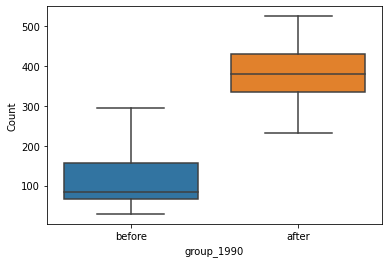

In [ ]:
sns.boxplot(data=disasters_by_year, x='group_1990', y='Count')

In [ ]:
temp_by_year1 = df_temperature_by_country.groupby(['year'])['mean_temp'].mean().to_frame().reset_index()
temp_by_year1.columns = ["Year", "Mean_Temp"]
temp_by_year1.head(10)
temp_by_year1.shape

(61, 2)

### Correlation

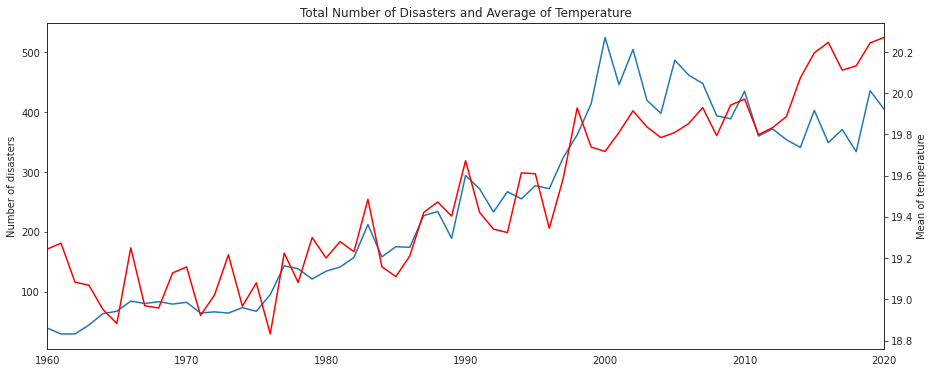

In [ ]:

fig = plt.figure(figsize=(15, 6))
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(disasters_by_year["Year"], disasters_by_year["Count"])
ax1.set_ylabel('Number of disasters')
ax1.set_title("Total Number of Disasters and Average of Temperature")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(disasters_by_year["Year"], temp_by_year1["Mean_Temp"], 'r')
ax2.set_xlim([1960, 2020])
ax2.set_ylabel('Mean of temperature')
ax2.set_xlabel('Total Number of Disasters and Average of Temperature')
plt.show()


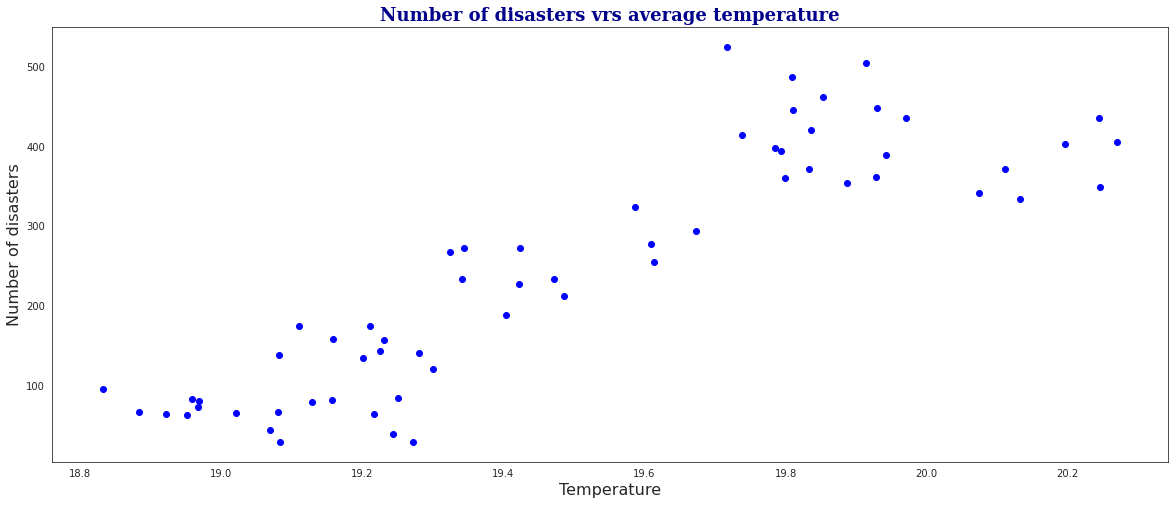

In [ ]:
fig = plt.figure(figsize=(20, 8))
plt.scatter(temp_by_year1["Mean_Temp"], disasters_by_year["Count"], c ="blue")

plt.xlabel("Temperature", size = 16,)
plt.ylabel("Number of disasters", size = 16)

plt.title("Number of disasters vrs average temperature", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
# To show the plot
plt.show()

Number of disasters have been on the rise
worldwide. At the same time temperatures, on average, have been rising.


A first hypothesis to raise may be: is temperature related to the presentation of natural disasters?


We are facing two variables (number of disasters and average of temperature) measured over time.

To find the correlation between two time series, the cross-correlation technique can be used.

The proper use of the cross-correlation technique requires stationarity in the series, as a prior and mandatory condition.

The decision on the stationarity of the series is made using the most widely used classical test: the Augmented Dickey Fuller (ADF) test. The ADF test accepts that a series is stationary if the absolute value of ADF is greater than the MacKinnon critical absolute value at 5%.

If there is no stationarity, a possible solution is to remove the trend using differences or transformations on the original series.

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.
from statsmodels.tsa.stattools import adfuller

ImportError: ignored

In [ ]:
# Select the series of the number of disasters per year
series_disasters = disasters_by_year['Count'].values
series_disasters

array([ 39,  29,  29,  44,  63,  67,  84,  80,  83,  79,  82,  64,  66,
        64,  73,  67,  95, 143, 138, 121, 134, 141, 157, 212, 158, 175,
       174, 227, 234, 189, 294, 272, 233, 267, 255, 277, 272, 324, 362,
       414, 525, 446, 505, 420, 398, 487, 462, 448, 394, 389, 435, 360,
       372, 354, 341, 403, 349, 371, 334, 436, 405])

In [ ]:
# ADF Test for Total Number of Disasters 
result = adfuller(series_disasters, autolag='AIC')

NameError: ignored

In [ ]:
# Conclusion about the stationarity of the total number of disasters
print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.017636
p-value: 0.746778
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
#Since the total number of disasters series is non-stationary, we make a transformation to remove trend

year_variation = np.log(disasters_by_year['Count'])- np.log(disasters_by_year['Count']).shift(1)
disasters_by_year['Count_dif'] = year_variation

disasters_by_year.head()

,Year,Count,Count_dif
59,1960,39,NaN
61,1961,29,-0.296266
60,1962,29,0.000000
58,1963,44,0.416894
57,1964,63,0.358945


Text(0.5, 1.0, 'First Difference on log Number of disasters')

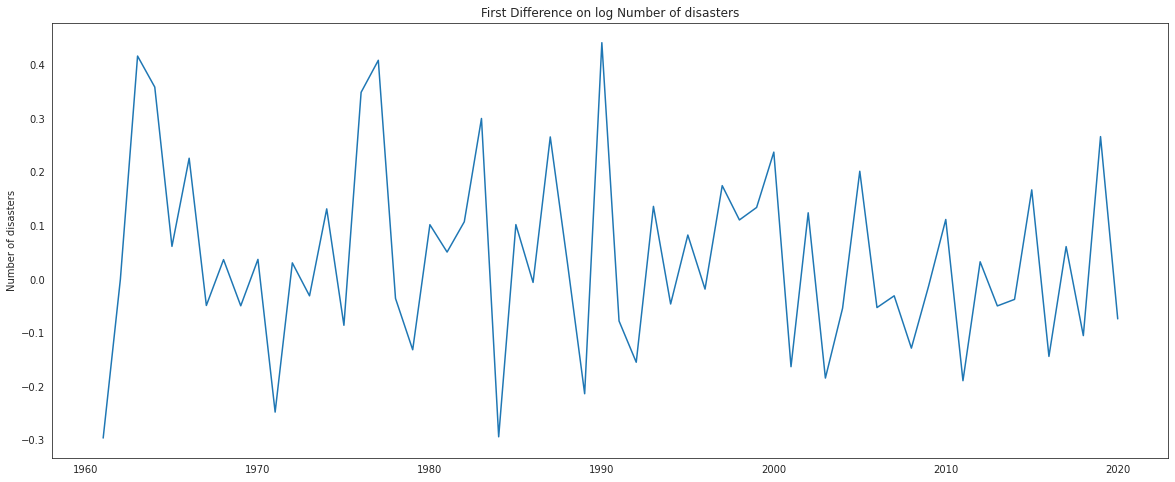

In [ ]:
fig = plt.figure(figsize=(20, 8))

sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(disasters_by_year["Year"], disasters_by_year["Count_dif"])
ax1.set_ylabel('Number of disasters')
ax1.set_title("First Difference on log Number of disasters")

In [ ]:
disasters_by_year1 = disasters_by_year[disasters_by_year['Count_dif'].notna()]
disasters_by_year1.head()

,Year,Count,Count_dif
61,1961,29,-0.296266
60,1962,29,0.000000
58,1963,44,0.416894
57,1964,63,0.358945
52,1965,67,0.061558


In [ ]:
series_disasters1 = disasters_by_year1['Count_dif'].values
series_disasters1

array([-0.29626582,  0.        ,  0.4168938 ,  0.35894509,  0.06155789,
        0.22612418, -0.04879016,  0.03681397, -0.04939276,  0.03727139,
       -0.24783616,  0.03077166, -0.03077166,  0.13157636, -0.08576682,
        0.34918427,  0.40896774, -0.03559095, -0.13146314,  0.10204925,
        0.05092009,  0.10748591,  0.30034047, -0.29399124,  0.10219094,
       -0.00573067,  0.26589472,  0.0303711 , -0.2135741 ,  0.44183275,
       -0.0777777 , -0.15476361,  0.1362102 , -0.04598511,  0.08275396,
       -0.01821544,  0.17494145,  0.1109007 ,  0.13422176,  0.23753229,
       -0.16307931,  0.12423948, -0.18430372, -0.05380271,  0.20181212,
       -0.05269923, -0.03077166, -0.12844232, -0.01277157,  0.11176669,
       -0.189242  ,  0.03278982, -0.04959694, -0.03741444,  0.16705408,
       -0.14386464,  0.06113014, -0.10506107,  0.26650125, -0.07375518])

In [ ]:
# ADF Test for transformation of Total Number of Disasters 
result1 = adfuller(series_disasters1, autolag='AIC')

In [ ]:
print('ADF Statistic: %f' % result1[0])

print('p-value: %f' % result1[1])

print('Critical Values:')

for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))
if result1[0] < result1[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -8.976610
p-value: 0.000000
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Reject Ho - Time Series is Stationary


In [ ]:
#extract the average annual temperature data
series_mean_temp = temp_by_year['mean_temp'].values
series_mean_temp

array([19.24372635, 19.27261645, 19.08356259, 19.06869723, 18.95178311,
       18.88293304, 19.25003275, 18.9692722 , 18.95804949, 19.12857715,
       19.15719796, 18.92242358, 19.02091339, 19.2161936 , 18.96699054,
       19.08007642, 18.83229622, 19.22449782, 19.08218341, 19.29999272,
       19.20076419, 19.28028748, 19.23126274, 19.48541121, 19.15862809,
       19.11040757, 19.21058588, 19.42168486, 19.47236536, 19.40386827,
       19.67281295, 19.42291121, 19.34087336, 19.32410844, 19.61351164,
       19.60934498, 19.34477802, 19.58648836, 19.92850437, 19.73889374,
       19.7175    , 19.80985808, 19.91461426, 19.83659389, 19.78459607,
       19.80967249, 19.85293668, 19.92998544, 19.79391194, 19.94206332,
       19.97116812, 19.79906841, 19.83283115, 19.88684134, 20.07446507,
       20.19586608, 20.24634279, 20.11162664, 20.13250728, 20.24391194,
       20.27024017])

In [ ]:
# Now we apply the ADF Test for the average temperature series.
result2 = adfuller(series_mean_temp, autolag='AIC')

In [ ]:
print('ADF Statistic: %f' % result2[0])

print('p-value: %f' % result2[1])

print('Critical Values:')

for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))
if result2[0] < result2[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 0.644111
p-value: 0.988654
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
Failed to Reject Ho - Time Series is Non-Stationary


In [ ]:
#We apply first difference to the temperature series

year_variation_temp = temp_by_year['mean_temp']- temp_by_year['mean_temp'].shift(1)
temp_by_year['mean_temp_dif'] = year_variation_temp


temp_by_year.head()

,year,mean_temp,mean_temp_dif
0,1960,19.243726,NaN
1,1961,19.272616,0.028890
2,1962,19.083563,-0.189054
3,1963,19.068697,-0.014865
4,1964,18.951783,-0.116914


Text(0.5, 1.0, 'First Difference on Average of Temperature')

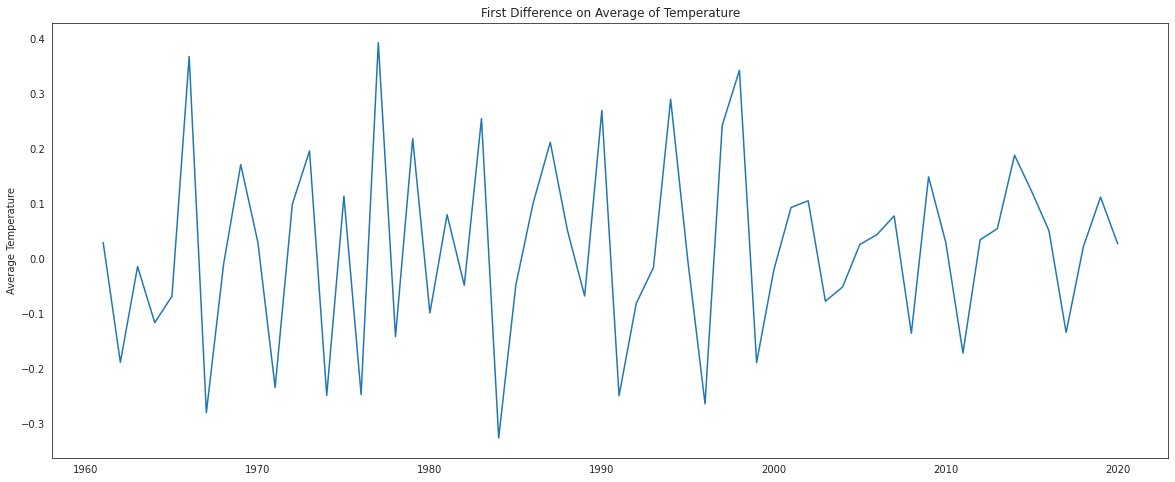

In [ ]:
fig = plt.figure(figsize=(20, 8))

sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(temp_by_year["year"], temp_by_year["mean_temp_dif"])
ax1.set_ylabel('Average Temperature')
ax1.set_title("First Difference on Average of Temperature")

In [ ]:
temp_by_year1 = temp_by_year[temp_by_year['mean_temp_dif'].notna()]
temp_by_year1.head()

,year,mean_temp,mean_temp_dif
1,1961,19.272616,0.028890
2,1962,19.083563,-0.189054
3,1963,19.068697,-0.014865
4,1964,18.951783,-0.116914
5,1965,18.882933,-0.068850


In [ ]:
series_mean_temp1 = temp_by_year1['mean_temp_dif'].values
series_mean_temp1

array([ 0.0288901 , -0.18905386, -0.01486536, -0.11691412, -0.06885007,
        0.36709971, -0.28076055, -0.01122271,  0.17052766,  0.02862082,
       -0.23477438,  0.09848981,  0.1952802 , -0.24920306,  0.11308588,
       -0.2477802 ,  0.3922016 , -0.14231441,  0.21780932, -0.09922853,
        0.07952329, -0.04902475,  0.25414847, -0.32678311, -0.04822052,
        0.10017831,  0.21109898,  0.05068049, -0.06849709,  0.26894469,
       -0.24990175, -0.08203785, -0.01676492,  0.2894032 , -0.00416667,
       -0.26456696,  0.24171033,  0.34201601, -0.18961063, -0.02139374,
        0.09235808,  0.10475619, -0.07802038, -0.05199782,  0.02507642,
        0.04326419,  0.07704876, -0.13607351,  0.14815138,  0.0291048 ,
       -0.17209971,  0.03376274,  0.05401019,  0.18762373,  0.12140102,
        0.05047671, -0.13471616,  0.02088064,  0.11140466,  0.02632824])

In [ ]:
# ADF Test for the first difference of Temperature
result3 = adfuller(series_mean_temp1, autolag='AIC')

In [ ]:
print('ADF Statistic: %f' % result3[0])

print('p-value: %f' % result3[1])

print('Critical Values:')

for key, value in result3[4].items():
    print('\t%s: %.3f' % (key, value))
if result3[0] < result3[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.972139
p-value: 0.000000
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
Reject Ho - Time Series is Stationary


In [ ]:
#With the two stationary series, the cross-correlation is calculated
sm.tsa.stattools.ccf(series_mean_temp1, series_disasters1)

array([ 0.31940529, -0.08966066, -0.06813755,  0.12865886, -0.05471806,
        0.05159504, -0.20948845,  0.26660222, -0.29540933,  0.01929603,
        0.02571725,  0.06710822, -0.11330878,  0.09940639,  0.03487021,
        0.05904779, -0.10725781,  0.14863154, -0.13827466, -0.03506675,
        0.05962946,  0.008614  ,  0.00978456, -0.03857229,  0.29280959,
       -0.04120249, -0.07992578, -0.13777471, -0.05904511, -0.05317688,
        0.01349076,  0.09112211,  0.09252227,  0.00901651,  0.08557709,
        0.06861742, -0.20423235, -0.030965  ,  0.30608831,  0.10485688,
       -0.18135071, -0.16440795,  0.11842068,  0.07457018, -0.08597804,
       -0.18349621,  0.15478614, -0.06050427, -0.28891871,  0.12222778,
        0.49834439,  0.2361268 ,  0.08620941, -0.39457262, -0.50792702,
        0.18259519,  0.76839709, -0.01672853, -0.55002118, -0.1063455 ])

The cross correlation at lag 0 is 0.32.
This makes intuitive sense: we would expect that an increase in average temperature in a given year is weakly positively associated with an increase in the number of disasters.

Temperature can influence the increase in the number of disasters, but it is not the only factor that affects it.

In [ ]:
tt=temp_by_year1
tt.rename({'year': 'Year'},axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_reg=disasters_by_year1
df_reg.head()

tt.head()


df_reg = pd.merge(df_reg, tt)
df_reg.head()

,Year,Count,Count_dif,mean_temp,mean_temp_dif
0,1961,29,-0.296266,19.272616,0.028890
1,1962,29,0.000000,19.083563,-0.189054
2,1963,44,0.416894,19.068697,-0.014865
3,1964,63,0.358945,18.951783,-0.116914
4,1965,67,0.061558,18.882933,-0.068850


In [ ]:
model1 = smf.ols(formula='Count_dif ~ mean_temp_dif', data=df_reg).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Count_dif   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     6.589
Date:                Sat, 25 Jun 2022   Prob (F-statistic):             0.0129
Time:                        19:31:28   Log-Likelihood:                 23.460
No. Observations:                  60   AIC:                            -42.92
Df Residuals:                      58   BIC:                            -38.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0334      0.022      1.546      0.128      -0.010       0.077
mean_temp_dif     0.3278      0.128      2.567      0.013       0.072       0.583
==============================================================================
Omnibus:                        2.384   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.201
Skew:                           0.460   Prob(JB):                        0.333
Kurtosis:                       2.815   Cond. No.                         5.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

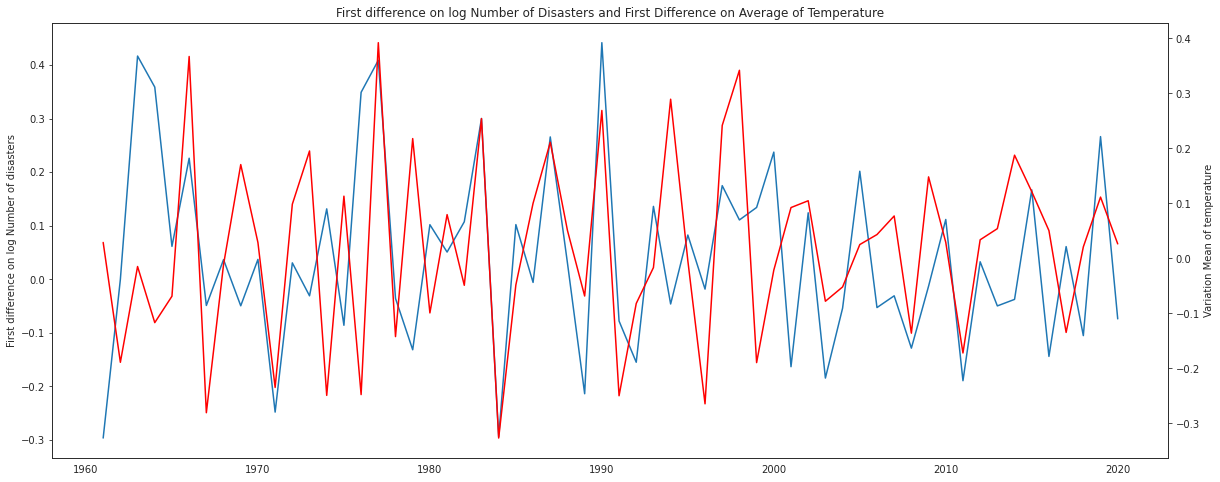

In [ ]:
fig = plt.figure(figsize=(20, 8))
#plt.figure(figsize=(24,40)) 
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(df_reg["Year"], df_reg["Count_dif"])
ax1.set_ylabel('First difference on log Number of disasters')
ax1.set_title("First difference on log Number of Disasters and First Difference on Average of Temperature")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(df_reg["Year"], df_reg["mean_temp_dif"], 'r')
#ax2.set_xlim([1960, 2020])
ax2.set_ylabel('Variation Mean of temperature')
ax2.set_xlabel('Number of Disasters and Average of Temperature')

plt.show()